# Problem 1 solution - Group 29

#### First we import the needed libraries and read the data from the csv files

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Read the two csv files with data for gdp/ capita and life expectency
gdp_data = pd.read_csv("./gdp2015.csv")
life_expectancy = pd.read_csv("./life-expectancy.csv")

# The colors we want to use in the plots
c_map = colors.LinearSegmentedColormap.from_list("custom", ["#FA8564", "#58ED2D", "#2FF743", "#2FF7B5", "#2DEDE3"])

xValues = []
yValues = []

#### Here we sort out the nations that doesn't contain both a value of GDP/ capita and Life expectency for a certain year. In our case this year is 2015.

In [23]:
def sort_data():
    life_expectancy.query("Year == 2015", inplace=True)

    # Makes sure that we only append values with both a mark in GDP/ capita and life expecency for the year 2015
    for i, rowI in gdp_data.iterrows():
        for j, rowJ in life_expectancy.iterrows():
            if rowJ['Code'] == rowI['Code']:
                xValues.append(rowI['GDP per capita'])
                yValues.append(rowJ['Life expectancy'])

#### This method is used to plot out the data. We define our own color palette so that we can create some nuance between the data points on the plot.

In [24]:
def draw_plot():
    
    # Defining the colors we want in the plot, in order from x=0 (GDP/ capita = 0)
    c_map = colors.LinearSegmentedColormap.from_list("custom", ["#FA8564", "#58ED2D", "#2FF743", "#2FF7B5", "#2DEDE3"])
    
    # Drawing the plot
    plt.scatter(xValues, yValues, cmap=c_map, c=gdp_data['GDP per capita'][1:168], s= 25)
    plt.colorbar()
    plt.title("GDP per capita in relation to Life Expectancy")
    plt.xscale('log')
    plt.xlabel("GDP per capita (USD $)")
    plt.ylabel("Life expectancy (years)")
    plt.show()

In [25]:
def draw_plot_help_lines():
    

    # Drawing the plot
    plt.scatter(xValues, yValues, cmap=c_map, c=gdp_data['GDP per capita'][1:168], s= 25)
    plt.colorbar()

    middle_x = gdp_data['GDP per capita'].mean()
    middle_y = life_expectancy['Life expectancy'].mean()
    max_y = life_expectancy['Life expectancy'].max()
    min_y = life_expectancy['Life expectancy'].min()
    max_x = gdp_data['GDP per capita'].max()

    x1, y1 = [0,max_x], [middle_y, middle_y]
    x2, y2 = [middle_x, middle_x],[min_y, max_y]
    plt.plot(x1,y1,x2,y2, marker='o')
    plt.title("GDP per capita in relation to Life Expectancy")
    plt.xscale('log')

    plt.xlabel("GDP per capita (USD $)")
    plt.ylabel("Life expectancy (years)")

    plt.show()

#### Run our sorting and draw method to see the result

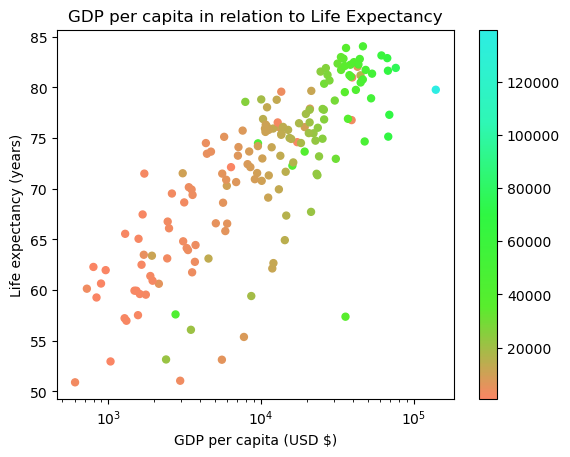

In [26]:
sort_data()
draw_plot()

In [33]:
#### Draws the same plot but with two help lines marking the median values for both meassurements

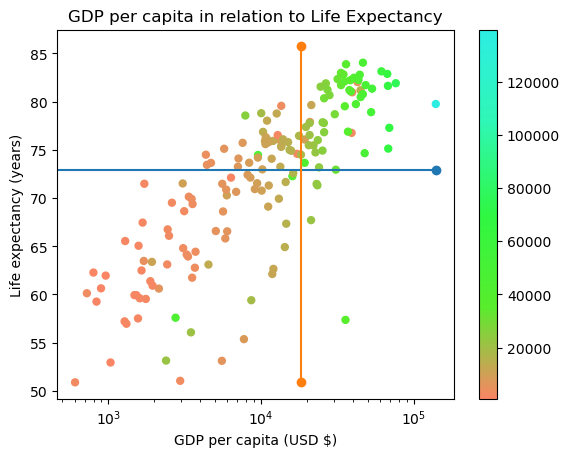

In [30]:
draw_plot_help_lines()